In [33]:
# Set working directory
import os
os.chdir("D:/Pinelopi/Documents/Σημαντικά/Data Scientist/Project/Original Data/EEA")
os.getcwd()

#Import important libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import f_oneway


In [55]:
# Read csv file and display basic information
df19= pd.read_csv("df_random.csv")
df19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154997 entries, 0 to 154996
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    154997 non-null  int64  
 1   Country               154997 non-null  object 
 2   VFN                   76845 non-null   object 
 3   Mp                    146363 non-null  object 
 4   Mh                    154997 non-null  object 
 5   Man                   154997 non-null  object 
 6   MMS                   150910 non-null  object 
 7   Tan                   154791 non-null  object 
 8   T                     154857 non-null  object 
 9   Va                    154785 non-null  object 
 10  Ve                    154780 non-null  object 
 11  Mk                    154986 non-null  object 
 12  Cn                    154939 non-null  object 
 13  Ct                    154712 non-null  object 
 14  Cr                    154997 non-null  object 
 15  

In [56]:
# Delete variables that are not usefull for the analysis, set index and check dataframe again
df19 = df19.drop(["Date of registration","Electric range (km)","Erwltp (g/km)","Ernedc (g/km)","Ewltp (g/km)","z (Wh/km)","IT","Status","r",'Vf',"De","At2 (mm)",'Mt',"Ct","Ve", "Tan","MMS","Man","VFN","Mp","Fuel consumption"], axis=1)

df19=df19.set_index('ID')

df19.info()

df19.head()

<class 'pandas.core.frame.DataFrame'>
Index: 154997 entries, 7701815 to 951196
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Country       154997 non-null  object 
 1   Mh            154997 non-null  object 
 2   T             154857 non-null  object 
 3   Va            154785 non-null  object 
 4   Mk            154986 non-null  object 
 5   Cn            154939 non-null  object 
 6   Cr            154997 non-null  object 
 7   m (kg)        154997 non-null  int64  
 8   Enedc (g/km)  154390 non-null  float64
 9   W (mm)        154837 non-null  float64
 10  At1 (mm)      154643 non-null  float64
 11  Ft            154997 non-null  object 
 12  Fm            154996 non-null  object 
 13  ec (cm3)      151499 non-null  float64
 14  ep (KW)       132016 non-null  float64
 15  year          154997 non-null  int64  
dtypes: float64(5), int64(2), object(9)
memory usage: 20.1+ MB


,Country,Mh,T,Va,Mk,Cn,Cr,m (kg),Enedc (g/km),W (mm),At1 (mm),Ft,Fm,ec (cm3),ep (KW),year
ID,,,,,,,,,,,,,,,,
7701815,DE,AUTOMOBILES PEUGEOT,L,C,PEUGEOT,308,M1,1394,102.0,2730.0,1565.0,diesel,M,1499.0,96.0,2019
3387186,AT,HYUNDAI CZECH,PDE,F5D21,HYUNDAI,I30,M1,1415,105.0,2650.0,1573.0,diesel,M,1598.0,85.0,2019
5745360,DE,MAGYAR SUZUKI,LY,DA1S,SUZUKI,VITARA,M1,1195,131.0,2500.0,1535.0,petrol,M,1373.0,103.0,2019
9394578,FR,AUTOMOBILES CITROEN,S,XYHY,CITROEN,C3,M1,1165,85.0,2539.0,1483.0,diesel,M,1499.0,75.0,2019
13508686,SE,BMW AG,FMX,YU71,MINI,COUNTRYMAN COOPER SE ALL,M1,1760,56.0,2670.0,1563.0,petrol/electric,P,1499.0,100.0,2019


In [57]:

# Remove data for electric cars in dataset and create dummy variables for them
df19 = df19[df19['Ft'] != "electric"]
df19 = df19[df19['Ft'] != "hydrogen"]

print(df19["Ft"].value_counts(normalize = True)) #Display frequencies of modalities
df19['Ft'] = df19['Ft'].replace({"petrol/electric": "Hybrid_PE", "diesel/electric": "Hybrid_DE"})

df19=df19.join(pd.get_dummies(df19.Ft, prefix="Fuel type").astype(int)) 

#df19['Electric'] = (df19["Ft"] == "electric") | (df19["Ft"] == "Hybrid_PE") | (df19["Ft"] == "Hybrid_DE") # Boolean series for electric technology or not

df19['Ft2'] = df19['Ft'].replace({"lpg": "others", "ng": "others", "ng-biomethane": "others", "hydrogen": "others", "e85": "others", "Hybrid_PE": "hybrid","Hybrid_DE": "hybrid"}) #create another fuel type variable with the least present modalities labeled as "others"

df19.head()

Ft
petrol             0.643093
diesel             0.326962
petrol/electric    0.012257
lpg                0.011808
ng                 0.003221
ng-biomethane      0.001300
diesel/electric    0.000891
e85                0.000462
unknown            0.000007
Name: proportion, dtype: float64


,Country,Mh,T,Va,Mk,Cn,Cr,m (kg),Enedc (g/km),W (mm),...,Fuel type_Hybrid_DE,Fuel type_Hybrid_PE,Fuel type_diesel,Fuel type_e85,Fuel type_lpg,Fuel type_ng,Fuel type_ng-biomethane,Fuel type_petrol,Fuel type_unknown,Ft2
ID,,,,,,,,,,,,,,,,,,,,,
7701815,DE,AUTOMOBILES PEUGEOT,L,C,PEUGEOT,308,M1,1394,102.0,2730.0,...,0,0,1,0,0,0,0,0,0,diesel
3387186,AT,HYUNDAI CZECH,PDE,F5D21,HYUNDAI,I30,M1,1415,105.0,2650.0,...,0,0,1,0,0,0,0,0,0,diesel
5745360,DE,MAGYAR SUZUKI,LY,DA1S,SUZUKI,VITARA,M1,1195,131.0,2500.0,...,0,0,0,0,0,0,0,1,0,petrol
9394578,FR,AUTOMOBILES CITROEN,S,XYHY,CITROEN,C3,M1,1165,85.0,2539.0,...,0,0,1,0,0,0,0,0,0,diesel
13508686,SE,BMW AG,FMX,YU71,MINI,COUNTRYMAN COOPER SE ALL,M1,1760,56.0,2670.0,...,0,1,0,0,0,0,0,0,0,hybrid


In [58]:
# Delete missing values
#df19 = df19[df19['Enedc (g/km)'].notna()] #only on target variable
df19=df19.dropna()


In [59]:
#Create datasets with numerical variables
var_num = df19.select_dtypes(include = ['int', 'float']) 
var_num=var_num.drop("year",axis=1)

var_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128127 entries, 7701815 to 4900907
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   m (kg)                   128127 non-null  int64  
 1   Enedc (g/km)             128127 non-null  float64
 2   W (mm)                   128127 non-null  float64
 3   At1 (mm)                 128127 non-null  float64
 4   ec (cm3)                 128127 non-null  float64
 5   ep (KW)                  128127 non-null  float64
 6   Fuel type_Hybrid_DE      128127 non-null  int32  
 7   Fuel type_Hybrid_PE      128127 non-null  int32  
 8   Fuel type_diesel         128127 non-null  int32  
 9   Fuel type_e85            128127 non-null  int32  
 10  Fuel type_lpg            128127 non-null  int32  
 11  Fuel type_ng             128127 non-null  int32  
 12  Fuel type_ng-biomethane  128127 non-null  int32  
 13  Fuel type_petrol         128127 non-null  int32  
 14  Fu

m (kg)
Enedc (g/km)
W (mm)
At1 (mm)
ec (cm3)
ep (KW)


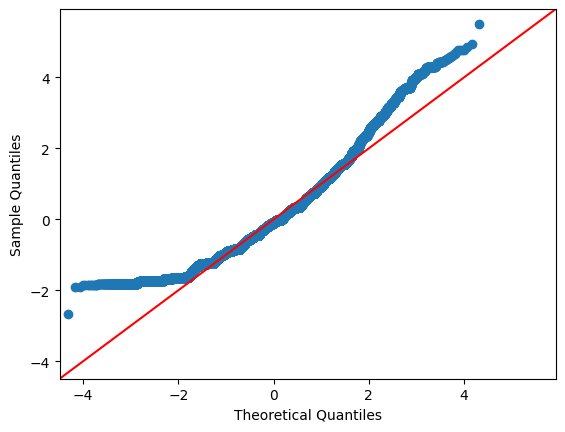

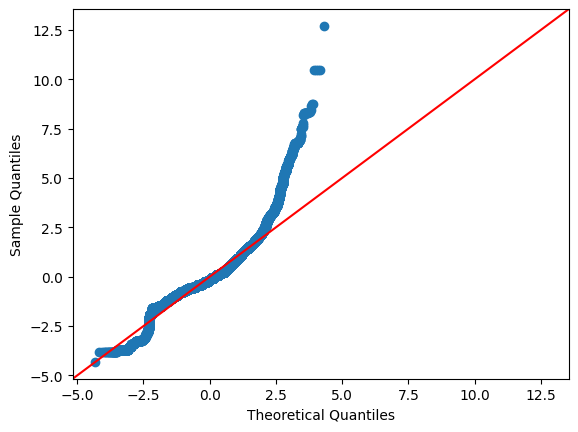

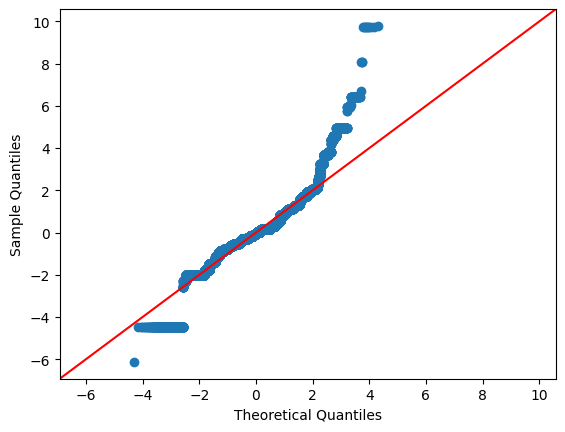

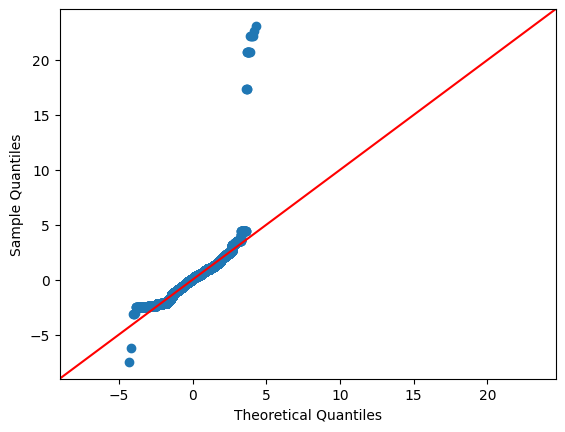

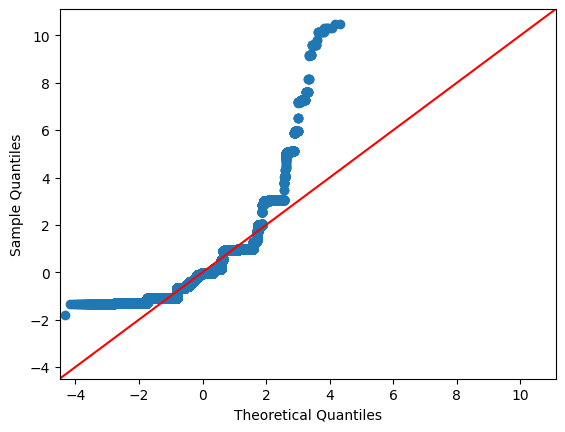

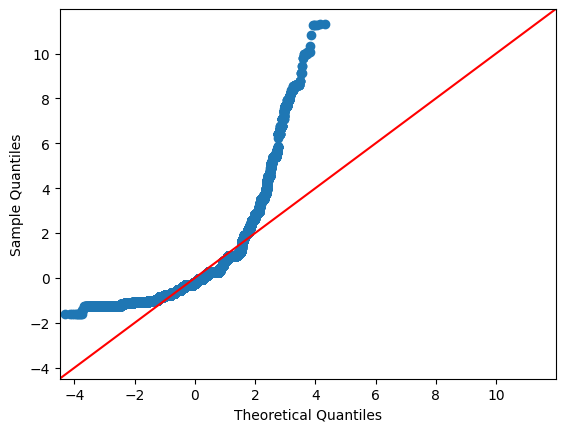

In [60]:
# Check normality
selected_columns = ["m (kg)", "Enedc (g/km)", "W (mm)", "At1 (mm)", "ec (cm3)", "ep (KW)"]
var_num_normality = var_num[selected_columns]

for column in var_num_normality:
  print(column)
  sm.qqplot(var_num_normality[column], line='45', fit = True) 

<Axes: >

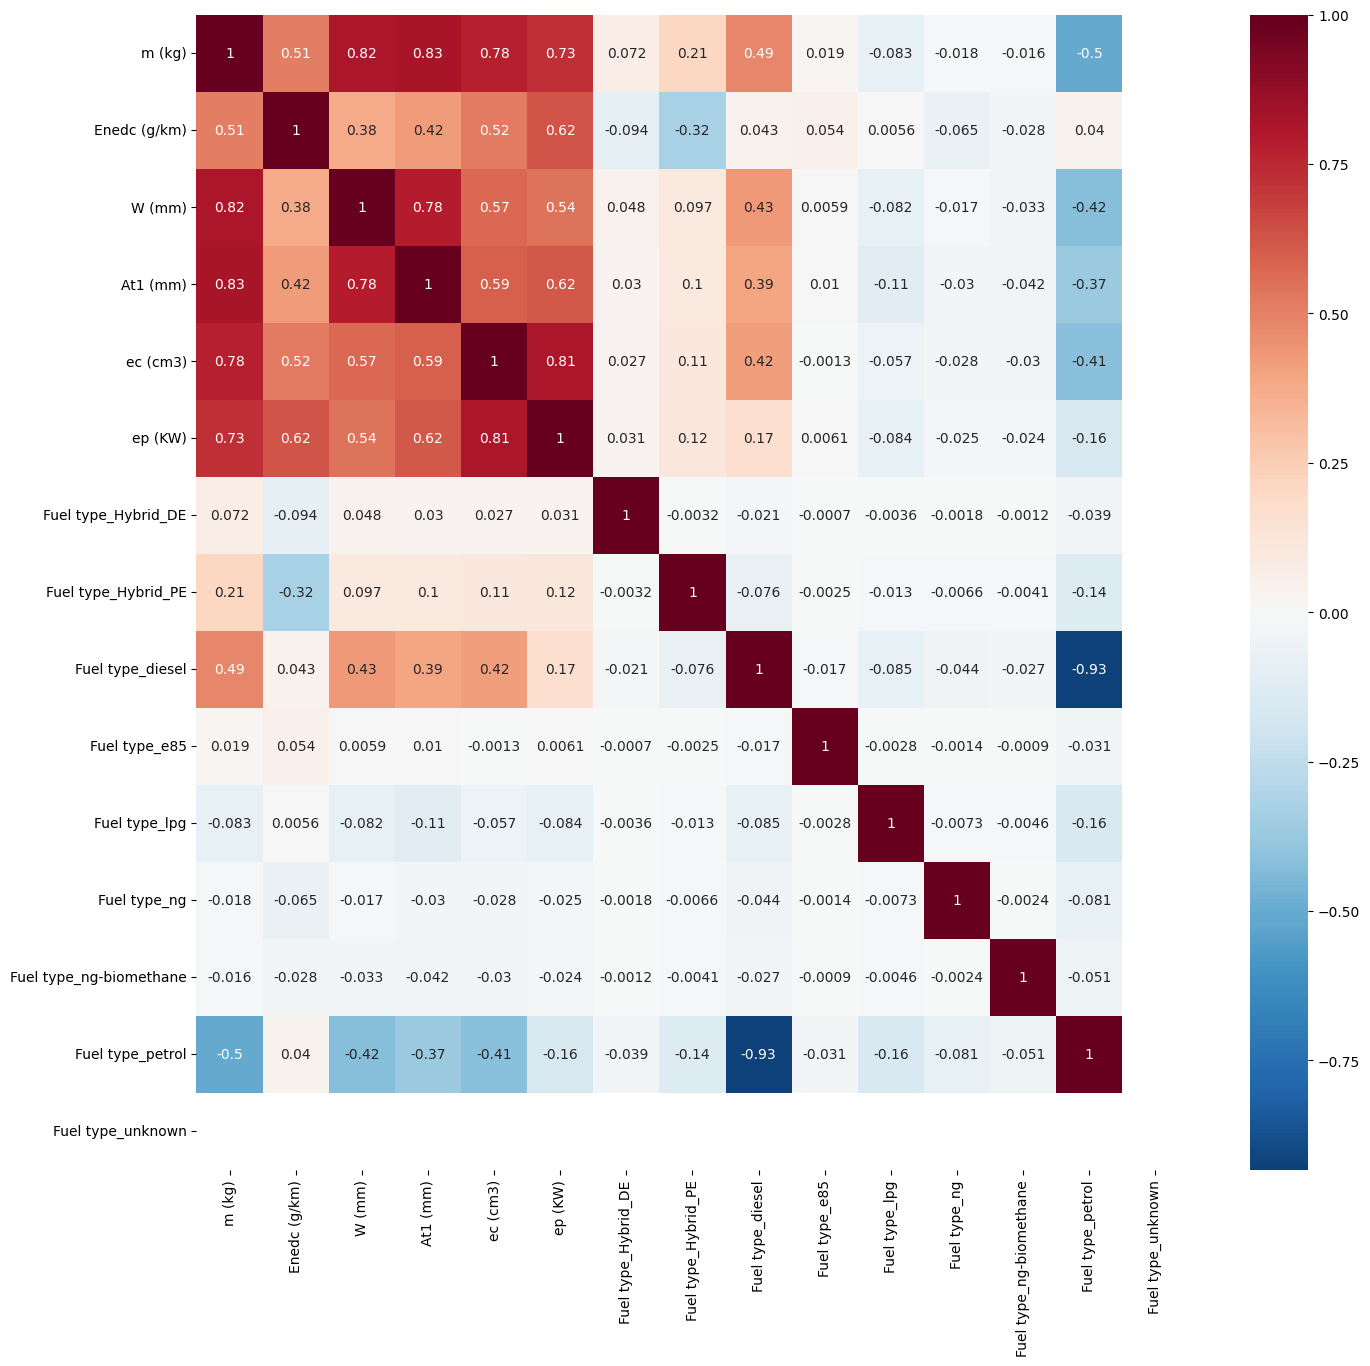

In [61]:
#Heatmap for correlation
plt.figure(figsize=(16,15))
sns.heatmap(var_num.corr(), annot=True, cmap="RdBu_r", center =0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'diesel'),
  Text(1, 0, 'petrol'),
  Text(2, 0, 'Hybrid_PE'),
  Text(3, 0, 'lpg'),
  Text(4, 0, 'ng'),
  Text(5, 0, 'ng-biomethane'),
  Text(6, 0, 'Hybrid_DE'),
  Text(7, 0, 'e85')])

<Figure size 1000x1000 with 0 Axes>

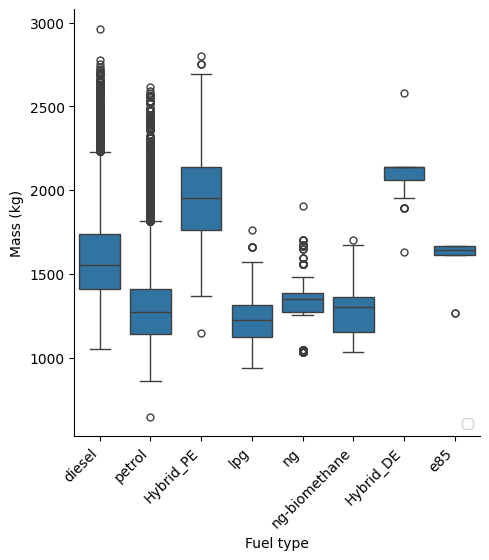

In [62]:
# To mass of cars per fuel type

plt.figure(figsize= (10,10))
sns.catplot( x="Ft", y="m (kg)", kind="box", data=df19)
plt.legend(loc='lower right')
plt.xlabel('Fuel type')
plt.ylabel('Mass (kg)')
plt.xticks(rotation=45, ha="right")

Country
DE    33898
FR    22885
IT    19121
ES    13282
PL     5322
BE     5204
NL     3416
SE     3374
AT     3315
CZ     2521
PT     2213
DK     2096
RO     1636
HU     1446
IE     1158
GR     1126
FI     1077
SK      937
NO      805
SI      695
HR      594
LU      546
LT      449
BG      288
EE      263
LV      169
CY      123
IS      102
MT       66
Name: count, dtype: int64


Text(0, 0.5, 'Fuel type')

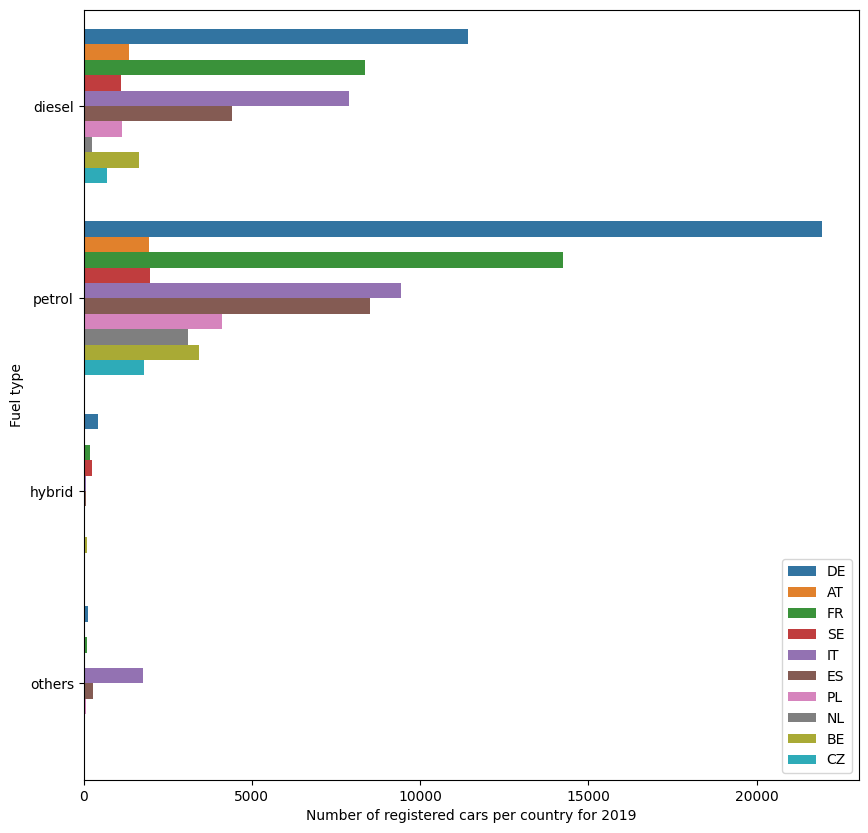

In [63]:
#To visualize number of cars per country and fuel type:
print(df19["Country"].value_counts()) #Display frequencies of modalities
value_counts_C = df19["Country"].value_counts()
most_frequent_C = value_counts_C.nlargest(10).index
for_graph_C = df19[df19["Country"].isin(most_frequent_C)]


plt.figure(figsize= (10,10))
sns.countplot(y="Ft2", hue= "Country", data=for_graph_C)
plt.legend(loc='lower right')
plt.xlabel('Number of registered cars per country for 2019')
plt.ylabel('Fuel type')

Mk
BMW               308
VOLVO             295
MITSUBISHI        248
KIA               143
MBZ               121
MINI               99
PORSCHE            86
LAND ROVER         58
TOYOTA             30
HYUNDAI            27
VW                 22
AUDI               22
VWG                21
VWG-VW             16
MERCEDES BENZ      11
BMW I               8
Kia                 6
Hyundai             5
Mitsubishi          4
DS                  3
OPEL                3
Volkswagen          3
Land Rover          2
Mercedes-Benz       2
BENTLEY             1
VOLKSWAGEN, VW      1
SKODA               1
Name: count, dtype: int64


Text(0.5, 1.0, 'CO2 emissions of hybrid cars per manufacturer')

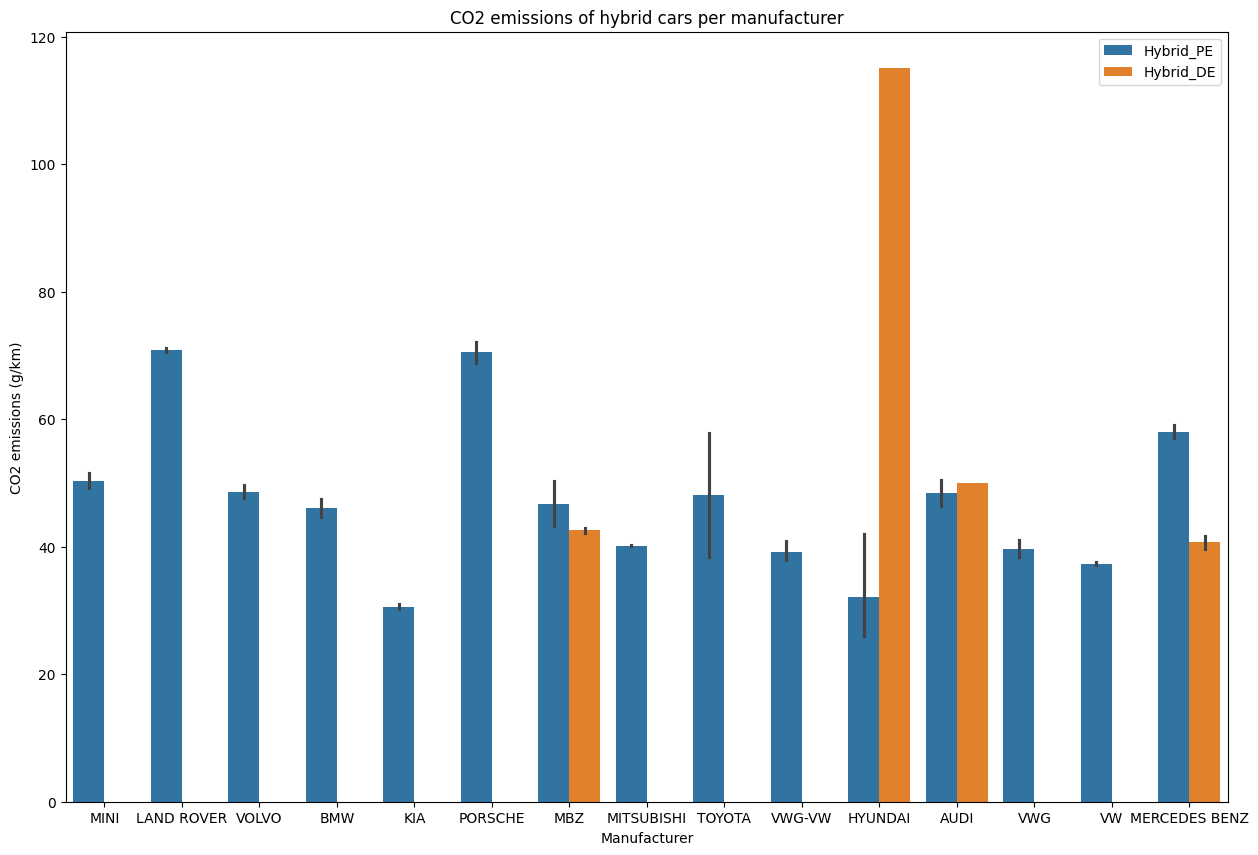

In [65]:
# To check emmisions for the 15 most present manufacturers for hybrid cars
df19['Mk'] = df19['Mk'].replace({"VOLKSWAGEN": "VWG", "VOLKSWAGEN VW": "VWG-VW", "MERCEDES-BENZ": "MBZ"}) #rename so it fits better in plot

#Select hybrid cars

df19_plot_hybrid=df19[(df19["Ft"] == "Hybrid_PE") | (df19["Ft"] == "Hybrid_DE")]

#Select the 15 most present manufacturers
print(df19_plot_hybrid["Mk"].value_counts()) #Display frequencies of modalities
value_counts = df19_plot_hybrid["Mk"].value_counts()
most_frequent_Mk = value_counts.nlargest(15).index
for_graph_Mk = df19_plot_hybrid[df19_plot_hybrid["Mk"].isin(most_frequent_Mk)]

#Plot
plt.figure(figsize= (15,10))
sns.barplot(x="Mk", y="Enedc (g/km)", hue= "Ft", data=for_graph_Mk)
#plt.xlim(0, 5500)
plt.legend(loc='upper right')
plt.xlabel('Manufacturer')
plt.ylabel('CO2 emissions (g/km)')
plt.title("CO2 emissions of hybrid cars per manufacturer")


Mk
RENAULT            9713
PEUGEOT            9164
VWG-VW             7709
FORD               7270
OPEL               6264
                   ... 
SSANG YONG            1
MERCEDESAMG           1
CATERHAM              1
DRINGHCFPORSCHE       1
VOSCO                 1
Name: count, Length: 117, dtype: int64


Text(0.5, 1.0, 'CO2 emissions of fossil fuel cars per manufacturer')

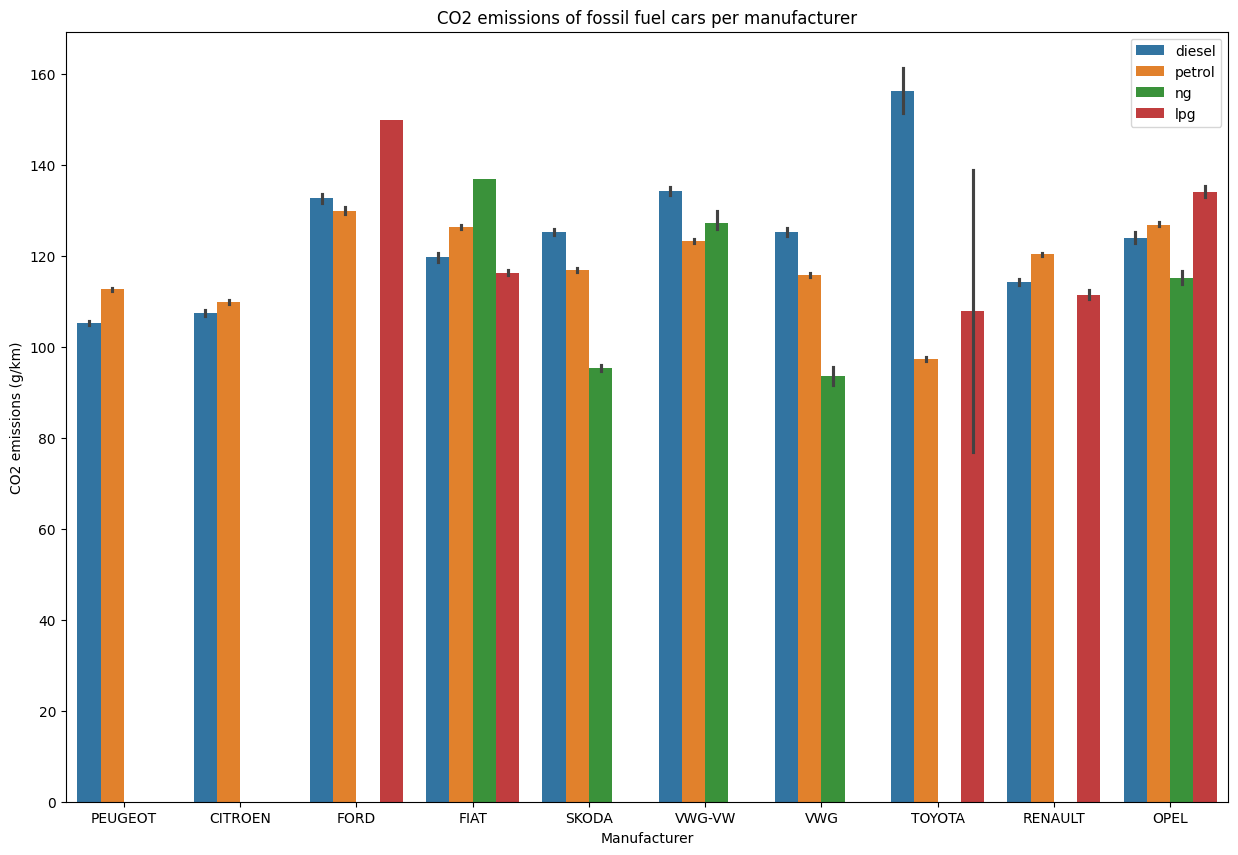

In [66]:
# To check emmisions for the 15 most present manufacturers for non electric cars
#Select non-electric cars and most present fuel types

df19_plot_fossil=df19[(df19["Ft"] == "diesel") | (df19["Ft"] == "petrol") |(df19["Ft"] == "lpg") | (df19["Ft"] == "ng")]


#Select the 10 most present manufacturers
print(df19_plot_fossil["Mk"].value_counts()) #Display frequencies of modalities

value_counts = df19_plot_fossil["Mk"].value_counts()
most_frequent_Mk = value_counts.nlargest(10).index
for_graph_Mk = df19_plot_fossil[df19_plot_fossil["Mk"].isin(most_frequent_Mk)]

for_graph_Mk.head()
#Plot
plt.figure(figsize= (15,10))
sns.barplot(x="Mk", y="Enedc (g/km)", hue= "Ft", data=for_graph_Mk)
#plt.xlim(0, 5500)
plt.legend(loc='upper right')
plt.xlabel('Manufacturer')
plt.ylabel('CO2 emissions (g/km)')
plt.title("CO2 emissions of fossil fuel cars per manufacturer")

,Country,Mh,T,Va,Mk,Cn,Cr,m (kg),Enedc (g/km),W (mm),...,Fuel type_Hybrid_DE,Fuel type_Hybrid_PE,Fuel type_diesel,Fuel type_e85,Fuel type_lpg,Fuel type_ng,Fuel type_ng-biomethane,Fuel type_petrol,Fuel type_unknown,Ft2
ID,,,,,,,,,,,,,,,,,,,,,
7701815,DE,AUTOMOBILES PEUGEOT,L,C,PEUGEOT,308,M1,1394,102.0,2730.0,...,0,0,1,0,0,0,0,0,0,diesel
9394578,FR,AUTOMOBILES CITROEN,S,XYHY,CITROEN,C3,M1,1165,85.0,2539.0,...,0,0,1,0,0,0,0,0,0,diesel
2593383,IT,FORD INDIA,KAF,BIKE1UX,FORD,KA,M1,1153,129.0,2490.0,...,0,0,0,0,0,0,0,1,0,petrol
9838718,FR,BMW AG,1K4,1R91,BMW,SERIE 1,M1,1615,180.0,2690.0,...,0,0,0,0,0,0,0,1,0,petrol
15086596,ES,AUTOMOBILES PEUGEOT,C,CHMR,PEUGEOT,208,M1,1050,110.0,2538.0,...,0,0,0,0,0,0,0,1,0,petrol


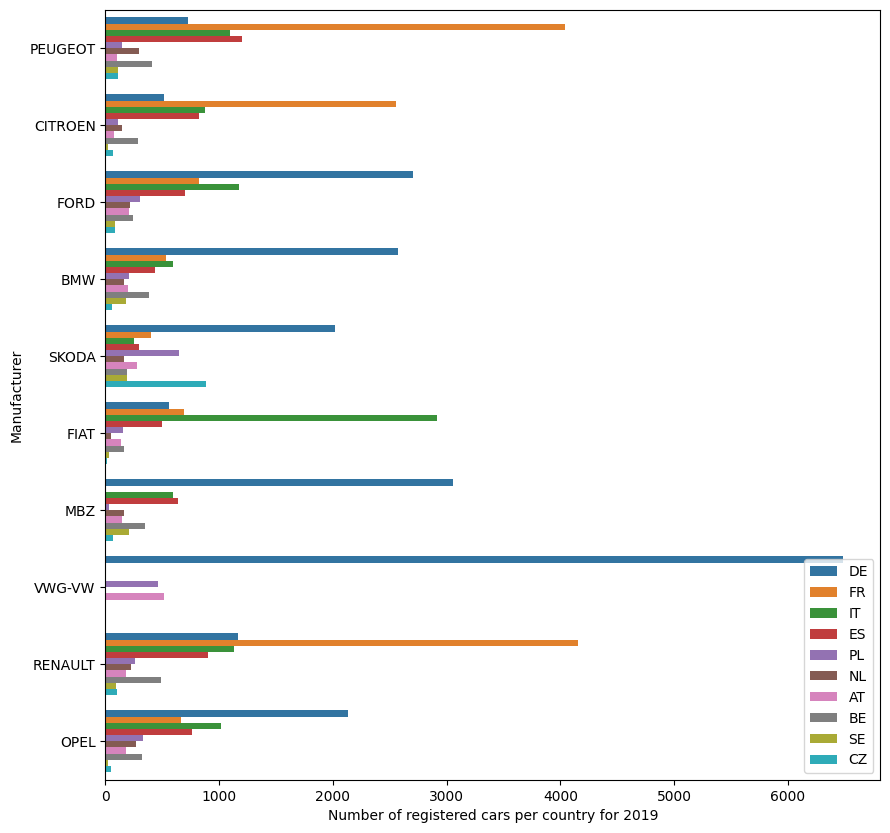

In [67]:
# To check number of cars per country per manufacturer
value_counts_MC = df19["Country"].value_counts()
most_frequent_MC = value_counts_MC.nlargest(10).index
for_graph_MC = df19[df19["Country"].isin(most_frequent_MC)]

value_counts_Mk = for_graph_MC["Mk"].value_counts()
most_frequent_Mk= value_counts_Mk.nlargest(10).index
for_graph_Mk = for_graph_MC[for_graph_MC["Mk"].isin(most_frequent_Mk)]

plt.figure(figsize= (10,10))
sns.countplot(y="Mk", hue= "Country", data=for_graph_Mk)
#plt.xlim(0, 5500)
plt.legend(loc='lower right')
plt.xlabel('Number of registered cars per country for 2019')
plt.ylabel('Manufacturer')
for_graph_Mk.head()


In [ ]:
from statsmodels.formula.api import ols
# Assuming you have a DataFrame named 'df' with columns 'values' and 'groups'
model = ols('Enedc (g/km) ~ C(Mk)', data=df19).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

# Fit the two-way ANOVA model
model = ols('Enedc (g/km) ~ C(Mk) * C(Ft)', data=df19_random_no_e).fit()

# Create an ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)
